In [9]:
#Load Image, View, Save - PIL
from PIL import Image
import cv2

im = Image.open("babel.jpg")
im.show()
im.save("example","JPEG")

In [10]:
#Intensity Transform - Negative, Log, Gamma Transform
from PIL import Image
import math
from pylab import *

In [11]:
def Negative(img):
    img1 = img
    for i in range(0,img1.shape[0]):
        for j in range(0,img1.shape[1]):
            img1[i,j] = 255 - img1[i,j]
    return img1

In [12]:
def Log(img):
    img1 = img
    for i in range(0,img1.shape[0]):
        for j in range(0,img1.shape[1]):
            if (math.log(1+img1[i,j],2)) < 0:
                img1[i,j]=0
            else:
                img1[i,j] = np.int(math.log(1+img1[i,j],2)) 
    return img1

In [13]:
def Gamma(img):
    img1 = img
    img1 = img1.astype(np.float) # Cast to float
    c = (img1.max()) / (img1.max()**(0.5))
    for i in range(0,img1.shape[0]-1):
        for j in range(0,img1.shape[1]-1):
            img1[i,j] = np.int(c*img1[i,j]**(2.5))

    # Cast back to uint8 for display
    img1 = img1.astype(np.uint8)
    return img1

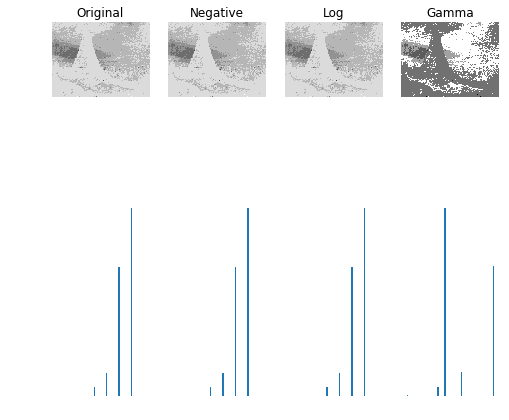

In [23]:
#img0 = cv2.imread('babel.jpg',0) # Original
img0 = array(Image.open('babel.jpg').convert("L")) # Original
img1 = Negative(img0) #Negative
img2 = Log(img0) #Log
img3 = Gamma(img0) #Gamma

fig, axs = subplots(2, 4, figsize=(8, 8))
axs[0,0].imshow(img0)
axs[0,0].set_title('Original')
axs[0,0].axis('off')
axs[0,1].imshow(img1)
axs[0,1].set_title('Negative')
axs[0,1].axis('off')
axs[0,2].imshow(img2)
axs[0,2].set_title('Log')
axs[0,2].axis('off')
axs[0,3].imshow(img3)
axs[0,3].set_title('Gamma')
axs[0,3].axis('off')
axs[1,0].hist(img0.flatten(),64)
axs[1,0].axis('off')
axs[1,1].hist(img1.flatten(),64)
axs[1,1].axis('off')
axs[1,2].hist(img2.flatten(),64)
axs[1,2].axis('off')
axs[1,3].hist(img3.flatten(),64)
axs[1,3].axis('off')
show()

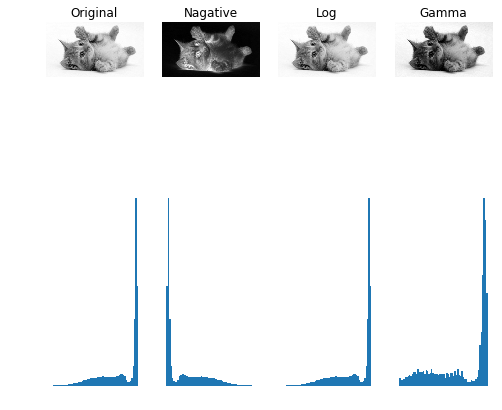

In [24]:
#Intensity Transformation
from PIL import Image
from pylab import *

ht = array(Image.open('cat.jpg').convert("L"))
ht2 = 255 - ht #invert image
ht3 = 0.5 * ht + 100 #Log
ht4 = 255.0 * (ht/200.0)**2 #Gamma

fig, axs = subplots(2, 4, figsize=(8, 8))
axs[0,0].imshow(ht)
axs[0,0].set_title("Original")
axs[0,0].axis('off')
axs[0,1].imshow(ht2)
axs[0,1].set_title("Nagative")
axs[0,1].axis('off')
axs[0,2].imshow(ht3)
axs[0,2].set_title("Log")
axs[0,2].axis('off')
axs[0,3].imshow(ht4)
axs[0,3].set_title("Gamma")
axs[0,3].axis('off')
axs[1,0].hist(ht.flatten(),64)
axs[1,0].axis('off')
axs[1,1].hist(ht2.flatten(),64)
axs[1,1].axis('off')
axs[1,2].hist(ht3.flatten(),64)
axs[1,2].axis('off')
axs[1,3].hist(ht4.flatten(),64)
axs[1,3].axis('off')

gray()
show()

In [102]:
#Histogram Equalization
def histeq(ht,nbr_bins=300):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(ht.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 256 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    ht2 = interp(ht.flatten(),bins[:-1],cdf)
    return ht2.reshape(ht.shape), cdf

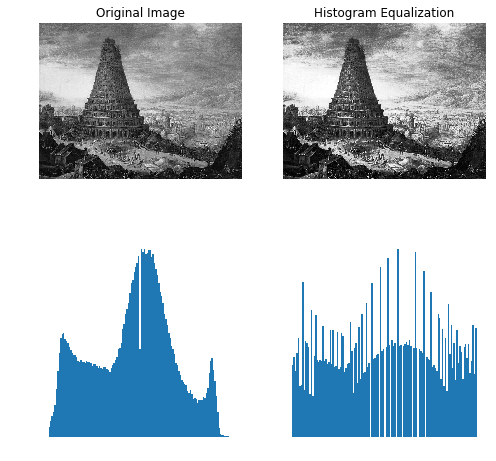

In [106]:
from PIL import Image
from pylab import *

im = array(Image.open('babel.jpg').convert('L'))

#Histogram Equalization function
im2,cdf = histeq(im)

fig, axs = subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(im)
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')
axs[0,1].imshow(im2)
axs[0,1].set_title('Histogram Equalization')
axs[0,1].axis('off')
axs[1,0].hist(im.flatten(),128)
axs[1,0].axis('off')
axs[1,1].hist(im2.flatten(),128)
axs[1,1].axis('off')
show()

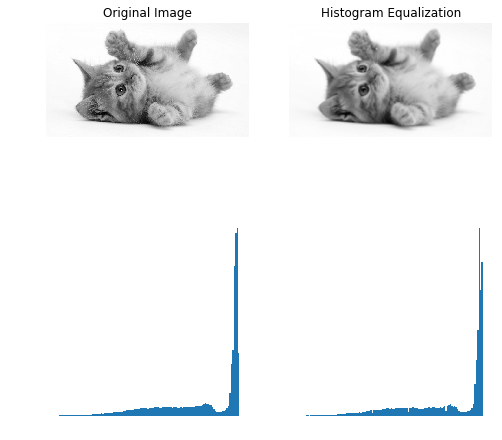

In [16]:
#Image Convolution - Average
#        {1, 1, 1,
# blur =  1, 1, 1,
#         1, 1, 1}

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.blur(img,(5,5))

fig, axs = subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(img)
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')
axs[0,1].imshow(blur)
axs[0,1].set_title('Histogram Equalization')
axs[0,1].axis('off')
axs[1,0].hist(img.flatten(),128)
axs[1,0].axis('off')
axs[1,1].hist(blur.flatten(),128)
axs[1,1].axis('off')
show()

In [19]:
#convolusion
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np
img=cv2.imread('fox.jpg',0)
row,col=img.shape

#Performing the laplacian operation
laplacian=np.zeros((row,col))
averaging=np.zeros((row,col))
maskSize=3
mask=np.zeros((maskSize,maskSize))

In [20]:
#Image Convolution - Laplacian

weight=maskSize*maskSize

mask=[[0,-1,0],[-1,4,-1],[0,-1,0]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k-i][l-j]*mask[i+(maskSize//2)][j+(maskSize//2)]
        laplacian[k][l]=acc

In [21]:
# Laplacian averaging

mask=[[1,1,1],[1,1,1],[1,1,1]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k+i][l+j]*mask[i+1][j+1]
        averaging[k][l]=acc /weight

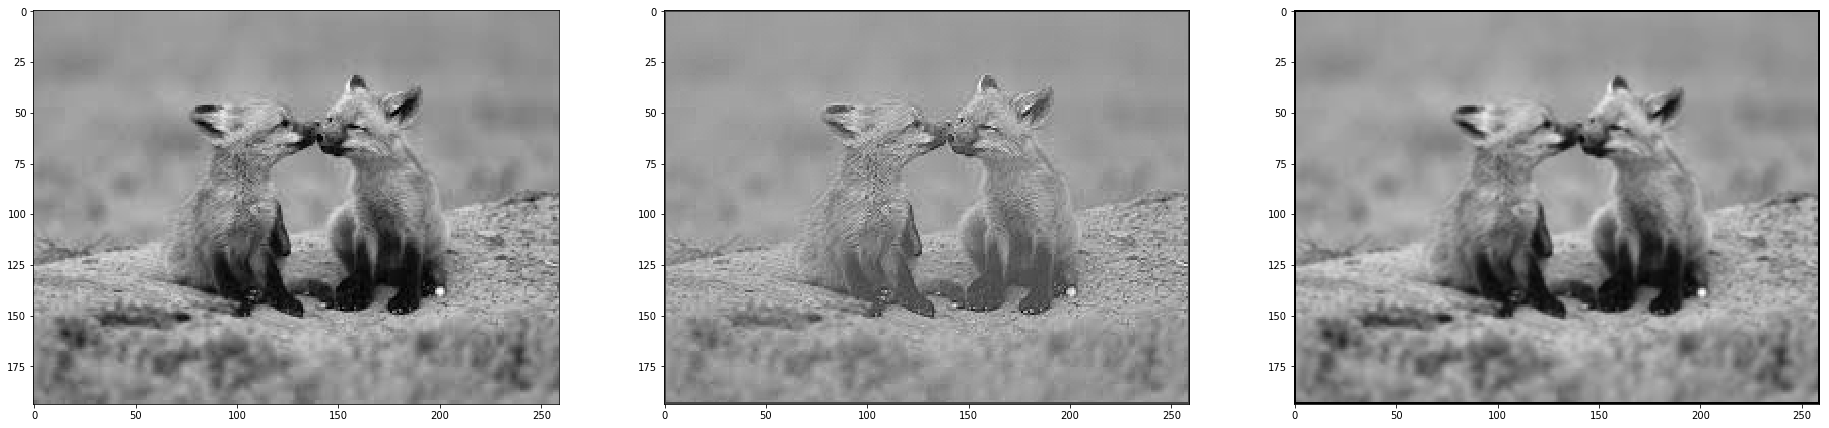

In [22]:
fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(laplacian)
axs[1].axis('on')
axs[2].imshow(averaging)
axs[2].axis('on')
gray()
show()

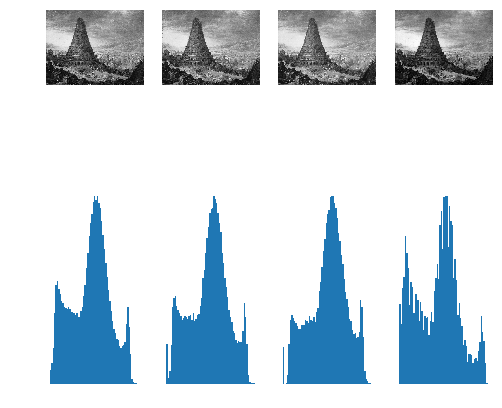

In [23]:
#median, max, min
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('babel.jpg',0)
row,col=img.shape

maskSize=3
median=np.zeros((row,col))
maximum=np.zeros((row,col))
minimum=np.zeros((row,col))
sort=np.zeros(maskSize*maskSize)

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        x=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                #insertion sort
                insert=0
                for a in range (x):
                    if sort[a]>img[k+i][l+j]:
                        for b in range (x,a,-1):
                            sort[b+1]=sort[b]
                        sort[a]=img[k+i][l+j]
                        insert=1
                if insert==0:
                    sort[x]=img[k+i][l+j]
                x=x+1       
        median[k][l]=sort[maskSize*maskSize//2]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                if img[k+i][l+j]>acc: 
                    acc=img[k+i][l+j]
        maximum[k][l]=acc

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=255
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                if img[k+i][l+j]<acc: 
                    acc=img[k+i][l+j]
        minimum[k][l]=acc
        
fig, axs = subplots(2, 4, figsize=(8, 8))
axs[0,0].imshow(img)
axs[0,0].axis('off')
axs[0,1].imshow(median)
axs[0,1].axis('off')
axs[0,2].imshow(maximum)
axs[0,2].axis('off')
axs[0,3].imshow(minimum)
axs[0,3].axis('off')
axs[1,0].hist(img.flatten(),64)
axs[1,0].axis('off')
axs[1,1].hist(median.flatten(),64)
axs[1,1].axis('off')
axs[1,2].hist(maximum.flatten(),64)
axs[1,2].axis('off')
axs[1,3].hist(minimum.flatten(),64)
axs[1,3].axis('off')
gray()
show()